In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
dados = pd.read_csv('DADOS/MICRODADOS_ENEM_2021.csv', sep = ';', encoding = "ISO-8859-1")
dados

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389827,210053249138,2021,7,F,1,3,1,1,0,1,...,A,A,A,B,A,A,B,A,A,B
3389828,210053776013,2021,7,F,1,1,1,1,5,1,...,B,A,B,C,A,A,E,B,B,B
3389829,210052441508,2021,13,F,1,3,1,1,15,1,...,B,A,A,A,A,A,B,A,B,B
3389830,210051139675,2021,7,F,1,1,1,1,4,1,...,B,A,B,B,A,B,E,A,C,B


In [4]:
dados.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 76 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   NU_INSCRICAO            3389832 non-null  int64  
 1   NU_ANO                  3389832 non-null  int64  
 2   TP_FAIXA_ETARIA         3389832 non-null  int64  
 3   TP_SEXO                 3389832 non-null  object 
 4   TP_ESTADO_CIVIL         3389832 non-null  int64  
 5   TP_COR_RACA             3389832 non-null  int64  
 6   TP_NACIONALIDADE        3389832 non-null  int64  
 7   TP_ST_CONCLUSAO         3389832 non-null  int64  
 8   TP_ANO_CONCLUIU         3389832 non-null  int64  
 9   TP_ESCOLA               3389832 non-null  int64  
 10  TP_ENSINO               1096828 non-null  float64
 11  IN_TREINEIRO            3389832 non-null  int64  
 12  CO_MUNICIPIO_ESC        813806 non-null   float64
 13  NO_MUNICIPIO_ESC        813806 non-null   object 
 14  CO

In [5]:
dados.describe().round(2)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,3.389832e+06,3389832.0,3389832.00,3389832.00,3389832.00,3389832.00,3389832.00,3389832.00,3389832.00,1096828.00,...,2245844.00,3389832.00,2378379.00,2378379.00,2378379.00,2378379.00,2378379.00,2378379.00,2378379.00,3389830.00
mean,2.100527e+11,2021.0,5.31,1.05,2.04,1.03,1.61,2.58,1.40,1.01,...,535.08,0.47,1.14,119.27,138.03,115.31,128.19,112.71,613.50,3.74
std,9.962402e+05,0.0,3.90,0.41,1.02,0.20,0.72,4.28,0.59,0.08,...,110.63,0.50,0.79,33.92,45.63,36.34,38.83,60.06,190.71,1.38
min,2.100510e+11,2021.0,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,2.100519e+11,2021.0,2.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,...,444.70,0.00,1.00,100.00,120.00,100.00,120.00,80.00,520.00,3.00
50%,2.100527e+11,2021.0,4.00,1.00,2.00,1.00,1.00,0.00,1.00,1.00,...,515.40,0.00,1.00,120.00,120.00,120.00,120.00,120.00,600.00,4.00
75%,2.100536e+11,2021.0,7.00,1.00,3.00,1.00,2.00,3.00,2.00,1.00,...,613.90,1.00,1.00,140.00,180.00,140.00,160.00,160.00,740.00,4.00
max,2.100545e+11,2021.0,20.00,4.00,6.00,4.00,4.00,15.00,3.00,2.00,...,953.10,1.00,9.00,200.00,200.00,200.00,200.00,200.00,1000.00,20.00


# Análise exploratória

## Olhando para a frequência de realização da prova

In [21]:
dados.shape

(3389832, 76)

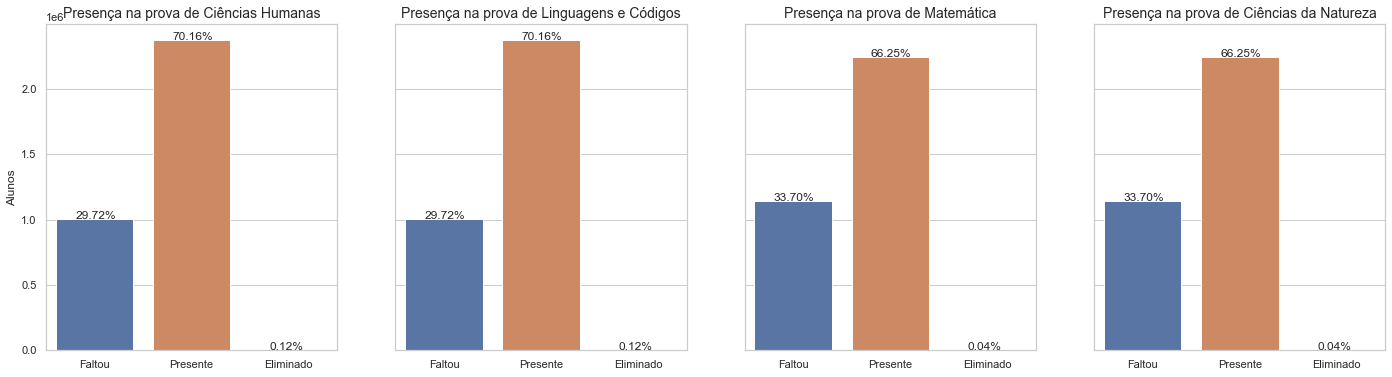

In [35]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, sharey=True, figsize=(24,6))

sns.countplot(data=dados, x='TP_PRESENCA_CH', ax=ax0)
ax0.set_title('Presença na prova de Ciências Humanas', fontsize=14)
ax0.set_xlabel('')
ax0.set_ylabel('Alunos')
ax0.set_xticks(np.arange(3), labels=['Faltou', 'Presente', 'Eliminado'])
for p, label in zip(ax0.patches, dados["TP_PRESENCA_CH"].value_counts(normalize=True).sort_index().values):
    ax0.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.2, p.get_height()+0.2))

sns.countplot(data=dados, x='TP_PRESENCA_LC', ax=ax1)
ax1.set_title('Presença na prova de Linguagens e Códigos', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticks(np.arange(3), labels=['Faltou', 'Presente', 'Eliminado'])
for p, label in zip(ax1.patches, dados["TP_PRESENCA_LC"].value_counts(normalize=True).sort_index().values):
    ax1.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.2, p.get_height()+0.2))

sns.countplot(data=dados, x='TP_PRESENCA_MT', ax=ax2)
ax2.set_title('Presença na prova de Matemática', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticks(np.arange(3), labels=['Faltou', 'Presente', 'Eliminado'])
for p, label in zip(ax2.patches, dados["TP_PRESENCA_MT"].value_counts(normalize=True, sort=False).values):
    ax2.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.2, p.get_height()+0.2))
    
sns.countplot(data=dados, x='TP_PRESENCA_CN', ax=ax3)
ax3.set_title('Presença na prova de Ciências da Natureza', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.set_xticks(np.arange(3), labels=['Faltou', 'Presente', 'Eliminado'])
for p, label in zip(ax3.patches, dados["TP_PRESENCA_CN"].value_counts(normalize=True, sort=False).values):
    ax3.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.2, p.get_height()+0.2))

plt.show()

Em média mais de 1/3 dos alunos faltaram em pelo menos 1 das provas, com leve aumento no segundo dia de prova.<br>
<b>Vejamos se na redação acontece o mesmo comportamento.</b>

In [8]:
falta_cn = dados['TP_PRESENCA_CN'] == 0
elimi_cn = dados['TP_PRESENCA_CN'] == 2
falta_mt = dados['TP_PRESENCA_MT'] == 0
elimi_mt = dados['TP_PRESENCA_MT'] == 2
falta_ch = dados['TP_PRESENCA_CH'] == 0
elimi_ch = dados['TP_PRESENCA_CH'] == 2
falta_lc = dados['TP_PRESENCA_LC'] == 0
elimi_lc = dados['TP_PRESENCA_LC'] == 2

dados['TP_STATUS_REDACAO'] = dados['TP_STATUS_REDACAO'].fillna(0)

nula_redacao = dados['TP_STATUS_REDACAO'] == 0

provas_redacao = {'para faltantes das provas': [dados[nula_redacao].shape[0] - dados[falta_ch].shape[0]],
             'para faltantes + eliminados das provas': [dados[nula_redacao].shape[0] - (dados[elimi_ch].shape[0] + dados[falta_ch].shape[0])]}
pd.DataFrame(provas_redacao, index=['Diferença Redação NaN'])

,para faltantes das provas,para faltantes + eliminados das provas
Diferença Redação NaN,4056,0


Conseguimos observar que os registros nulos da variável 'TP_STATUS_REDACAO' contabilizam o mesmo número de alunos faltantes + eliminados das provas do mesmo dia.

* <b>Registro de nova categoria '0' na variável 'TP_STATUS_REDACAO' representando os alunos faltantes</b>

Categoria selecionada pelos alunos com valores nulos 'NaN' na mesma variável 'TP_STATUS_REDACAO', que foi possível sua confirmação comparando os valores de estudantes que faltram mais os estudantes eliminados nas provas do mesmo dia 'TP_PRESENCA_CH' e 'TP_PRESENCA_LC' com os valores nulos

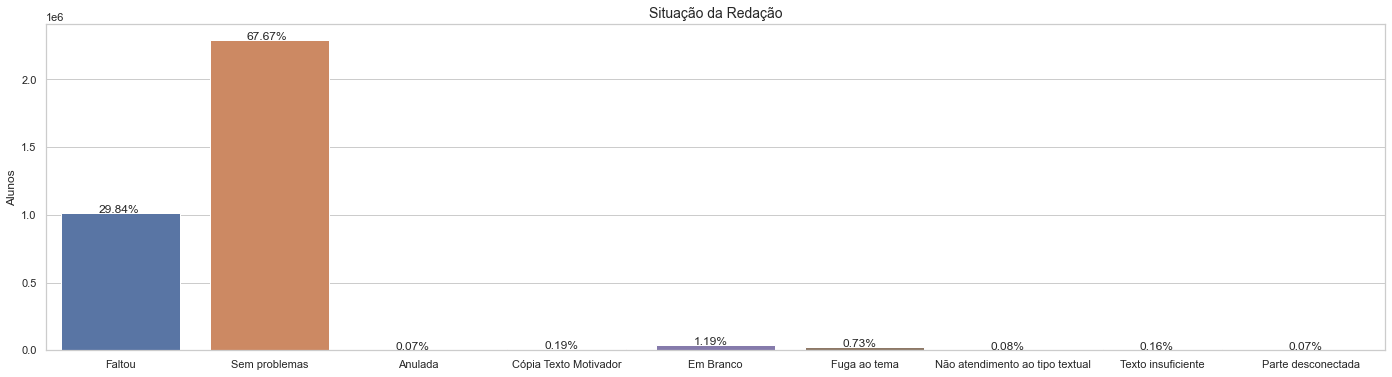

In [71]:
fig, ax = plt.subplots(figsize=(24,6))

ax = sns.countplot(data=dados, x='TP_STATUS_REDACAO')
ax.set_title('Situação da Redação', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Alunos')
ax.set_xticks(np.arange(9), labels=['Faltou', 'Sem problemas', 'Anulada', 'Cópia Texto Motivador', 'Em Branco', 'Fuga ao tema', 'Não atendimento ao tipo textual', 'Texto insuficiente', 'Parte desconectada'])
for p, label in zip(ax.patches, dados["TP_STATUS_REDACAO"].value_counts(normalize=True).sort_index().values):
    ax.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.25, p.get_height()+0.2))

plt.show()

Observamos comportamento identico às provas do 1º dia que foram realizadas junto à redação.

In [31]:
falta_dia_1 = (falta_ch & falta_lc) | (elimi_ch & elimi_lc)
falta_dia_2 = (falta_cn & falta_mt) | (elimi_cn & elimi_mt)
falta_dia_ambos = falta_dia_1 & falta_dia_2
falta_dia_qualquer = falta_cn | falta_mt | falta_ch | falta_lc | elimi_cn | elimi_mt | elimi_ch | elimi_lc

provas_por_dia = {
    '1º Dia': [dados[falta_dia_1].shape[0]],
    '2º Dia': [dados[falta_dia_2].shape[0]],
    'Apenas 1 dia': [dados[falta_dia_1 ^ falta_dia_2].shape[0]],
    'Ambos os dias': [dados[falta_dia_ambos].shape[0]],
    'Qualquer dia': [dados[falta_dia_qualquer].shape[0]],
    'Redação': [dados[nula_redacao].shape[0]]
}
pd.DataFrame(provas_por_dia, index=['Faltas + Eliminações'])

,1º Dia,2º Dia,Apenas 1 dia,Ambos os dias,Qualquer dia,Redação
Faltas + Eliminações,1011453,1143988,148009,1003716,1151725,1011453


Conseguimos observar que o dia com mais evasão foi o 2º, seguido pelo primeiro e depois pelo grupo de pessoas que faltaram os dois dias.<br>
- Os faltantes da Redação e do 1º dia são identicos.
- Os estudantes que faltaram em apenas um dos dias representa apenas 12,85% dos alunos que faltaram.<br>
- Enquanto os alunos que faltaram em qualquer prova representa 33,97% da totalidade de registros na base de dados.

## Comparando alunos presentes com alunos faltantes

In [22]:
dados['BOL_FALTA'] = falta_dia_qualquer.values
dados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,BOL_FALTA
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,B,A,A,B,A,B,B,True
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,B,A,A,C,A,A,A,False
2,210052589243,2021,13,F,3,1,1,1,15,1,...,A,A,B,A,A,C,B,B,B,True
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,B,A,A,B,A,B,B,False
4,210051353021,2021,2,F,1,3,1,2,0,2,...,A,A,B,A,B,E,A,B,B,False


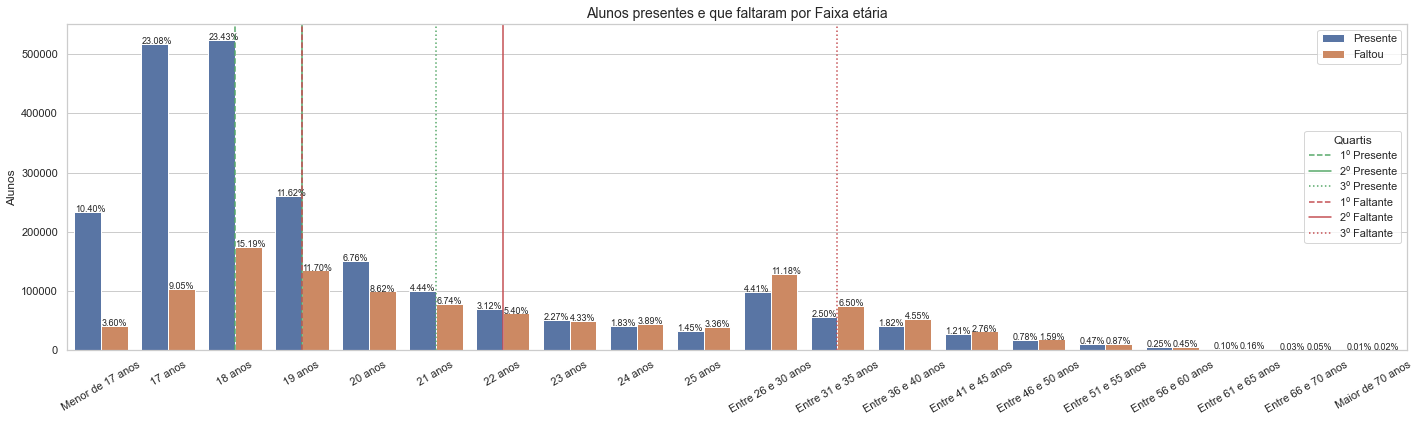

In [70]:
labels = ['Menor de 17 anos', '17 anos', '18 anos', '19 anos', '20 anos', '21 anos', '22 anos', '23 anos', '24 anos', '25 anos', 'Entre 26 e 30 anos', 'Entre 31 e 35 anos',
          'Entre 36 e 40 anos', 'Entre 41 e 45 anos', 'Entre 46 e 50 anos', 'Entre 51 e 55 anos', 'Entre 56 e 60 anos', 'Entre 61 e 65 anos', 'Entre 66 e 70 anos', 'Maior de 70 anos']

fig, ax = plt.subplots(figsize=(24,6))

ax = sns.countplot(data=dados, x='TP_FAIXA_ETARIA', hue='BOL_FALTA')
ax.set_title('Alunos presentes e que faltaram por Faixa etária', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Alunos')
ax.set_xticks(np.arange(20), labels=labels, rotation=30)
for p, label in zip(ax.patches, dados.groupby(['BOL_FALTA'])["TP_FAIXA_ETARIA"].value_counts(normalize=True).sort_index().values):
    ax.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.01, p.get_height()+0.2), fontsize=9)
    
legenda = plt.legend(title='', loc='upper right', labels=['Presente', 'Faltou'])
ax.add_artist(legenda)

ax.axvline(dados.query('BOL_FALTA == False')['TP_FAIXA_ETARIA'].quantile(.25), color='g', linestyle='--')
ax.axvline(dados.query('BOL_FALTA == False')['TP_FAIXA_ETARIA'].quantile(.5), color='g', linestyle='-')
ax.axvline(dados.query('BOL_FALTA == False')['TP_FAIXA_ETARIA'].quantile(.75), color='g', linestyle=':')
ax.axvline(dados.query('BOL_FALTA == True')['TP_FAIXA_ETARIA'].quantile(.25), color='r', linestyle='--')
ax.axvline(dados.query('BOL_FALTA == True')['TP_FAIXA_ETARIA'].quantile(.5), color='r', linestyle='-')
ax.axvline(dados.query('BOL_FALTA == True')['TP_FAIXA_ETARIA'].quantile(.75), color='r', linestyle=':')
plt.legend(title='Quartis', loc='center right', labels=['1º Presente','2º Presente','3º Presente',
                                                        '1º Faltante','2º Faltante','3º Faltante'])

plt.show()

É notável a maior proporção de pessoas de idade mais avançada entre o grupo que faltou.
- 75% dos alunos presentes em todas as provas entre 18 e 21 anos
- 75% dos que faltaram entre 19 e 31 à 35 anos

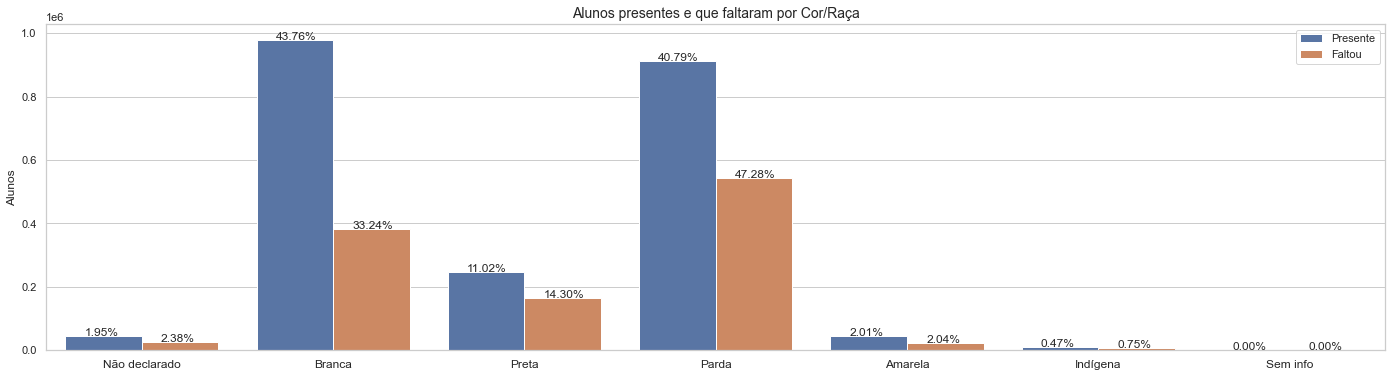

In [75]:
labels = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Sem info']

fig, ax = plt.subplots(figsize=(24,6))

ax = sns.countplot(data=dados, x='TP_COR_RACA', hue='BOL_FALTA')
ax.set_title('Alunos presentes e que faltaram por Cor/Raça',fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Alunos')
ax.set_xticks(np.arange(7), labels=labels, fontsize=12)
for p, label in zip(ax.patches, dados.groupby(['BOL_FALTA'])["TP_COR_RACA"].value_counts(normalize=True).sort_index().values):
    ax.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.1, p.get_height()+0.3), fontsize=12)
    
plt.legend(title='', loc='upper right', labels=['Presente', 'Faltou'])
plt.show()

Também é possível notar uma leve tendência a candidatos não-brancos entre os que faltaram.

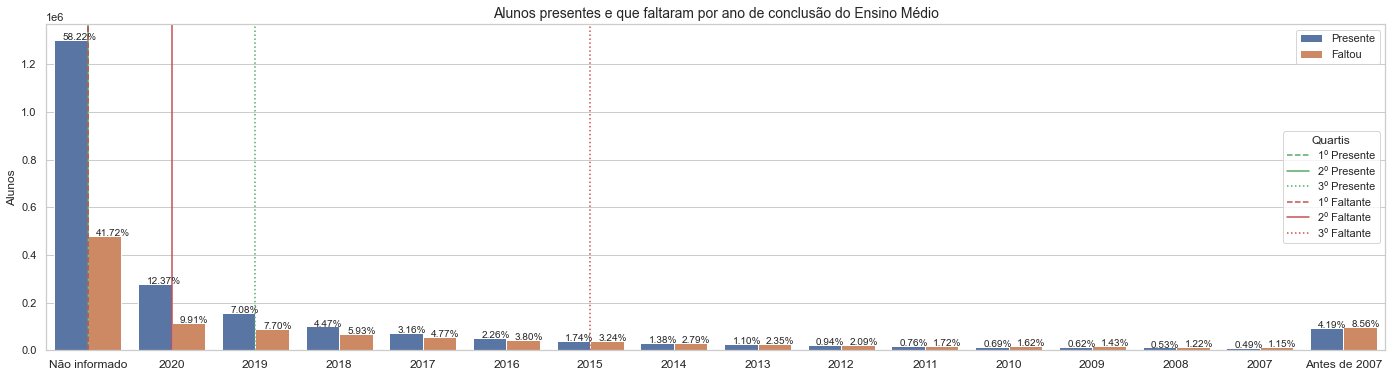

In [77]:
labels = ['Não informado','2020','2019','2018','2017','2016','2015','2014',
          '2013','2012','2011','2010','2009','2008','2007','Antes de 2007']

fig, ax = plt.subplots(figsize=(24,6))

ax = sns.countplot(data=dados, x='TP_ANO_CONCLUIU', hue='BOL_FALTA')
ax.set_title('Alunos presentes e que faltaram por ano de conclusão do Ensino Médio', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Alunos')
ax.set_xticks(np.arange(16), labels=labels, fontsize=12)
for p, label in zip(ax.patches, dados.groupby(['BOL_FALTA'])["TP_ANO_CONCLUIU"].value_counts(normalize=True).sort_index().values):
    ax.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.1, p.get_height()+0.3), fontsize=10)
    
legenda = plt.legend(title='', loc='upper right', labels=['Presente', 'Faltou'])
ax.add_artist(legenda)

ax.axvline(dados.query('BOL_FALTA == False')['TP_ANO_CONCLUIU'].quantile(.25), color='g', linestyle='--')
ax.axvline(dados.query('BOL_FALTA == False')['TP_ANO_CONCLUIU'].quantile(.5), color='g', linestyle='-')
ax.axvline(dados.query('BOL_FALTA == False')['TP_ANO_CONCLUIU'].quantile(.75), color='g', linestyle=':')
ax.axvline(dados.query('BOL_FALTA == True')['TP_ANO_CONCLUIU'].quantile(.25), color='r', linestyle='--')
ax.axvline(dados.query('BOL_FALTA == True')['TP_ANO_CONCLUIU'].quantile(.5), color='r', linestyle='-')
ax.axvline(dados.query('BOL_FALTA == True')['TP_ANO_CONCLUIU'].quantile(.75), color='r', linestyle=':')
plt.legend(title='Quartis', loc='center right', labels=['1º Presente','2º Presente','3º Presente',
                                                        '1º Faltante','2º Faltante','3º Faltante'])
plt.show()

Candidatos que faltaram proporcionalmente maior a até o ano de 2019.
- 25% dos candidatos presentes em todas as provas concluiram o Ensino Médio nos anos de 2020 e 2019, outros 25% até 2018.
- 25% dos que não estavam presentes concluiram entre 2020 e 2015, outros 25%  até 2014.

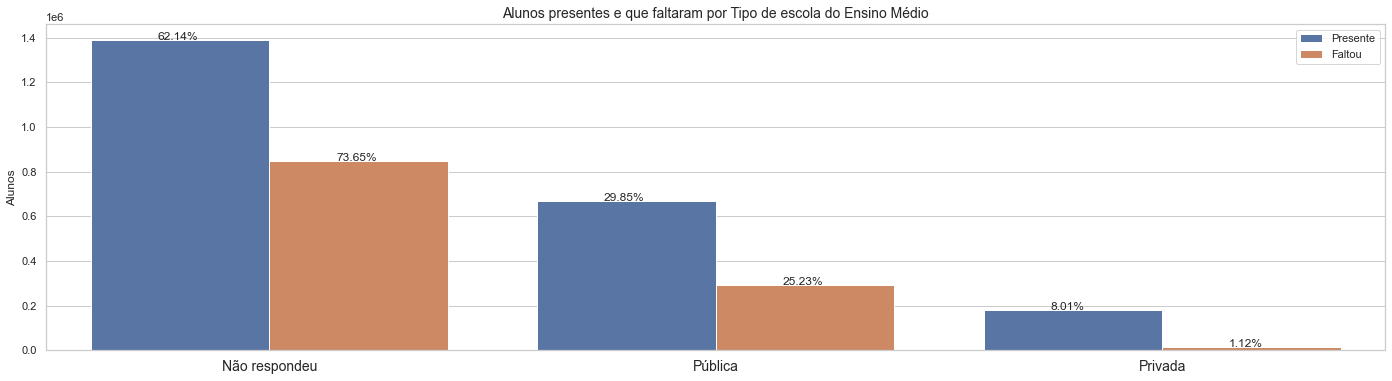

In [78]:
labels = ['Não respondeu','Pública','Privada']

fig, ax = plt.subplots(figsize=(24,6))

ax = sns.countplot(data=dados, x='TP_ESCOLA', hue='BOL_FALTA')
ax.set_title('Alunos presentes e que faltaram por Tipo de escola do Ensino Médio', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Alunos')
ax.set_xticks(np.arange(3), labels=labels, fontsize=14)
for p, label in zip(ax.patches, dados.groupby(['BOL_FALTA'])["TP_ESCOLA"].value_counts(normalize=True).sort_index().values):
    ax.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.15, p.get_height()+0.3), fontsize=12)
    
plt.legend(title='', loc='upper right', labels=['Presente', 'Faltou'])

plt.show()

- Apenas 1,12% dos alunos que faltaram em alguma prova estudaram em escola privada durante o Ensino Médio, contra 8,01% dos presentes em todas as provas.

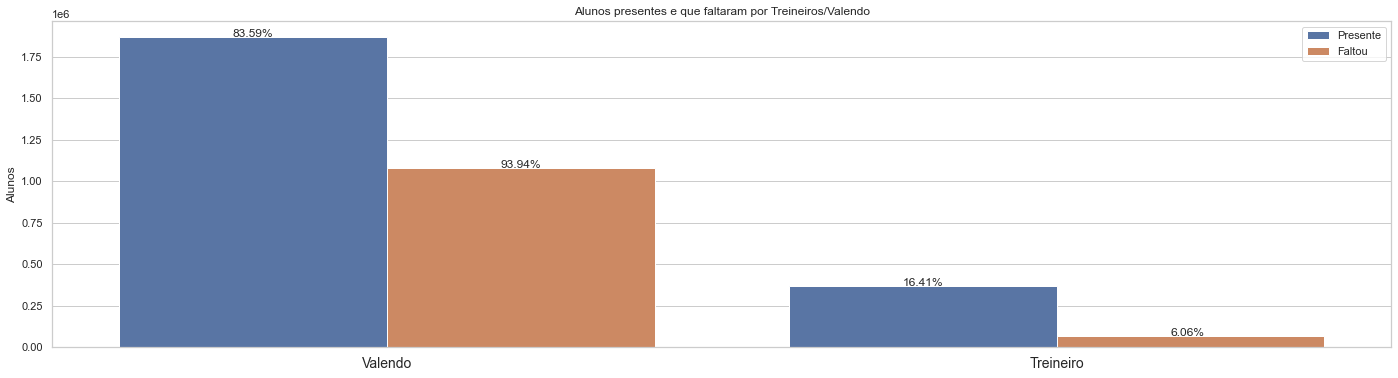

In [96]:
labels = ['Valendo', 'Treineiro']

fig, ax = plt.subplots(figsize=(24,6))

ax = sns.countplot(data=dados, x='IN_TREINEIRO', hue='BOL_FALTA')
ax.set_title('Alunos presentes e que faltaram por Treineiros/Valendo')
ax.set_xlabel('')
ax.set_ylabel('Alunos')
ax.set_xticks(np.arange(2), labels=labels, fontsize=14)
for p, label in zip(ax.patches, dados.groupby(['BOL_FALTA'])["IN_TREINEIRO"].value_counts(normalize=True).sort_index().values):
    ax.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.17, p.get_height()+0.3), fontsize=12)
    
plt.legend(title='', loc='upper right', labels=['Presente', 'Faltou'])
plt.show()

<i>* Aqui vale ressaltar que foi considerado treineiro o inscrito que não havia concluido o ensino médio e não o concluiria em 2021. *</i><br>
É possível observar que proporcionalmente os candidatos que faltaram em alguma prova tem uma tendência em estar fazendo o Enem valendo.<br>Isso pode ser influenciado pelo método de seleção de quem é treineiro ou não, já que parece incluir apenas estudantes do ensino médio.

In [ ]:
fig, ax = plt.subplots(figsize=(24,6))

ax = sns.countplot(data=dados, x='SG_UF_PROVA', hue='BOL_FALTA', order=dados["SG_UF_PROVA"].value_counts().sort_index().index)
ax.set_title('Alunos presentes e que faltaram por Estado', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Alunos')
for p, label in zip(ax.patches, dados.groupby(['BOL_FALTA'])["SG_UF_PROVA"].value_counts(normalize=True).sort_index().values):
    ax.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.01, p.get_height()+0.3), fontsize=8)
    
plt.legend(title='', loc='upper right', labels=['Presente', 'Faltou'])
plt.show()

In [ ]:
dados["SG_UF_PROVA"].unique().index